# MRS etalon line overlap
In this notebook we attempt to derive a wavelength solution for MRS band 1A based on the periodic pattern of the etalon line overlapping in the RAL FTS and the MIRI FM datasets.  

In [1]:
# load python modules
import funcs
import mrsobs
from distortionMaps import d2cMapping

import numpy as np
from matplotlib import pyplot as plt
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

In [4]:
# Define paths to data
workDir  = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir   = workDir+'cdp_data/CDP8/'
lvl2path = workDir+'/FM_data/LVL2/'
d2cMapDir = workDir+'notebooks/distortionMaps/'

# MRS spectral band
bands = ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']

# DISTORTION CDP version to compare against
d2c_fileversion = '8B.05.00'

In [6]:
# plot data
xpos = {}
lambdaMap = {}
for band in bands:
    print 'Band {}'.format(band)
    d2cMaps = d2cMapping(band,cdpDir,fileversion=d2c_fileversion)
    lambdaMap[band] = d2cMaps['lambdaMap']

Band 1A
Band 1B
Band 1C
Band 2A
Band 2B
Band 2C
Band 3A
Band 3B
Band 3C
Band 4A
Band 4B
Band 4C


In [17]:
# Load Zemax wavelength solutions for all the bands
# Note, only bands 1B, 1C, 2A, 2B, 2C, 3A, 3B, 3C, and 4A have been calibrated using MRS data
# So bands 1A, 4B, and 4C still use the Zemax wavelength solution
# Version 06.04.00 of the DISTORTION CDP contains the Zemax wavelength solution for all MRS bands besides 1B and 2A (previously calibrated by Alvaro Labiano)
# Version 04.02.00 of the DISTORTION CDP contains the Zemax wavelength solution for MRS band 1A and 2A

lambdaMap_Zemax = {}
for band in bands:
    print 'Band {}'.format(band)
    if band in ['1A','1C','2B','2C','3A','3B','3C','4A','4B','4C']:
        d2cMaps = d2cMapping(band,cdpDir.replace('CDP8/',''),fileversion='06.04.00')
    elif band in ['1B','2A']:
        d2cMaps = d2cMapping(band,cdpDir.replace('CDP8/',''),fileversion='05.03.00')
    lambdaMap_Zemax[band] = d2cMaps['lambdaMap']

Band 1A
Band 1B
Band 1C
Band 2A
Band 2B
Band 2C
Band 3A
Band 3B
Band 3C
Band 4A
Band 4B
Band 4C


<IPython.core.display.Javascript object>


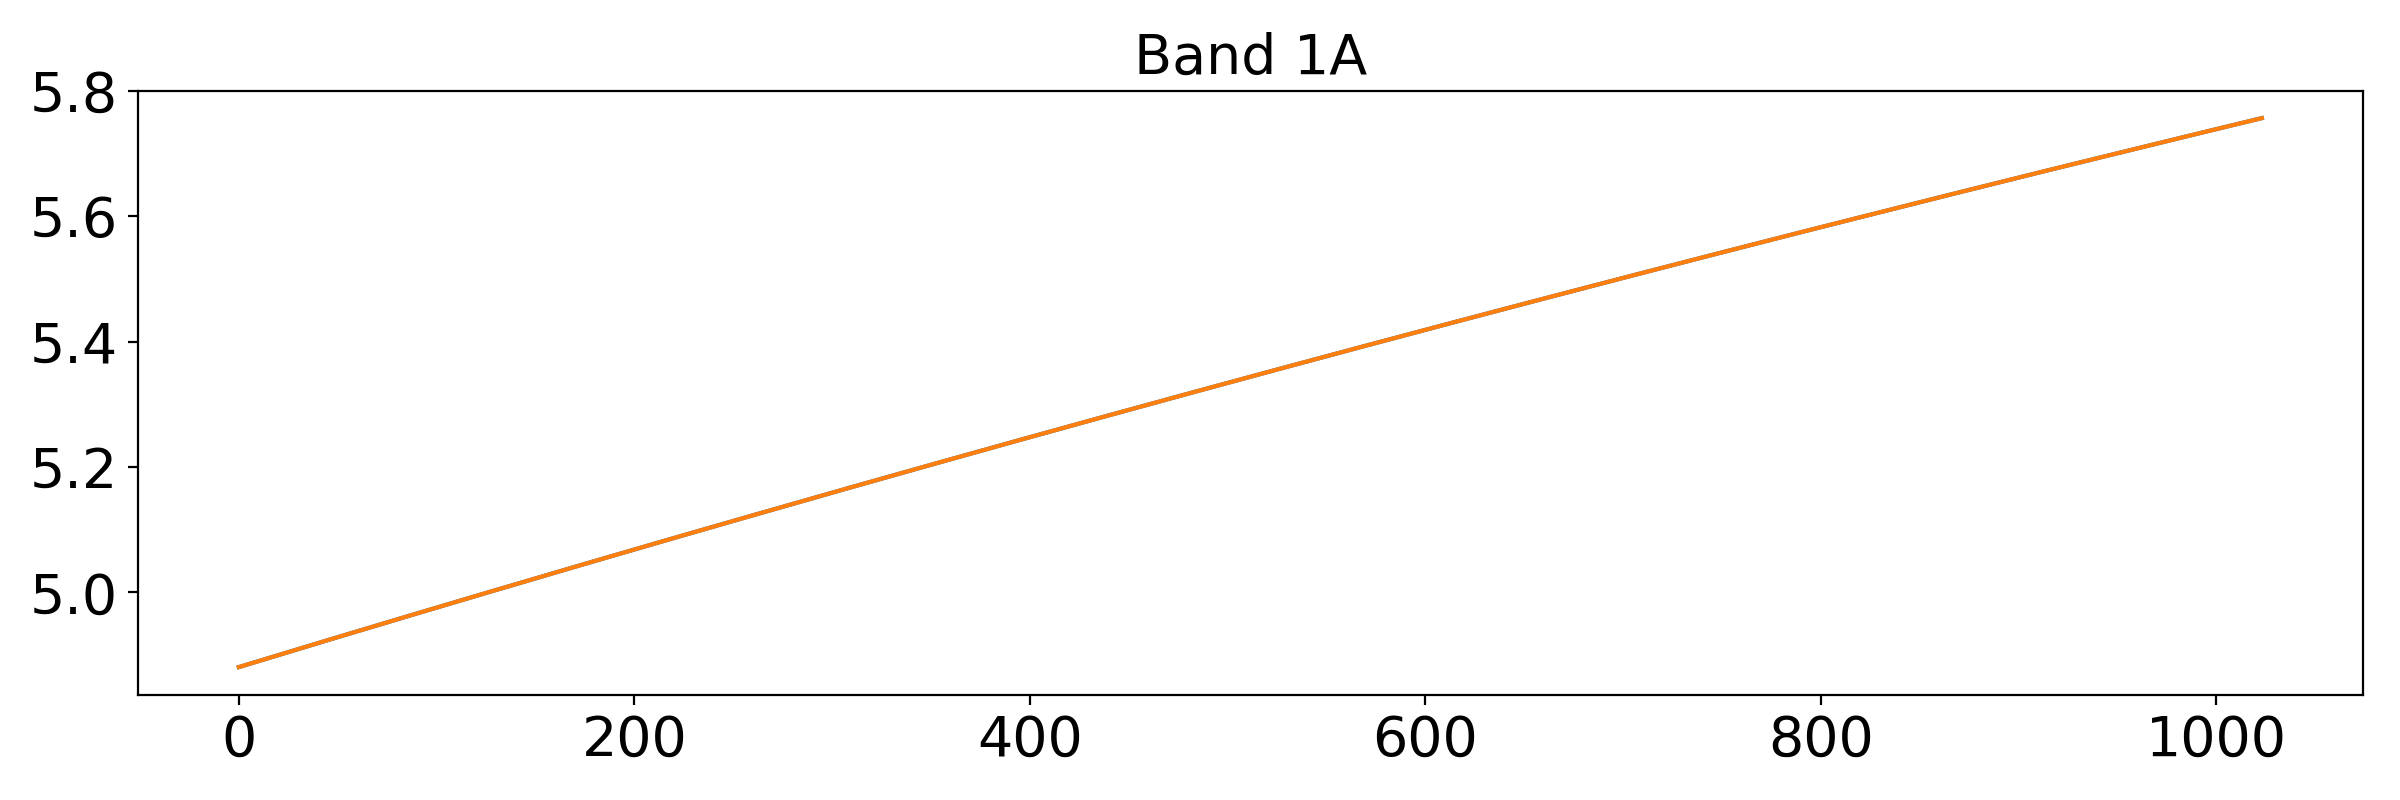

<IPython.core.display.Javascript object>


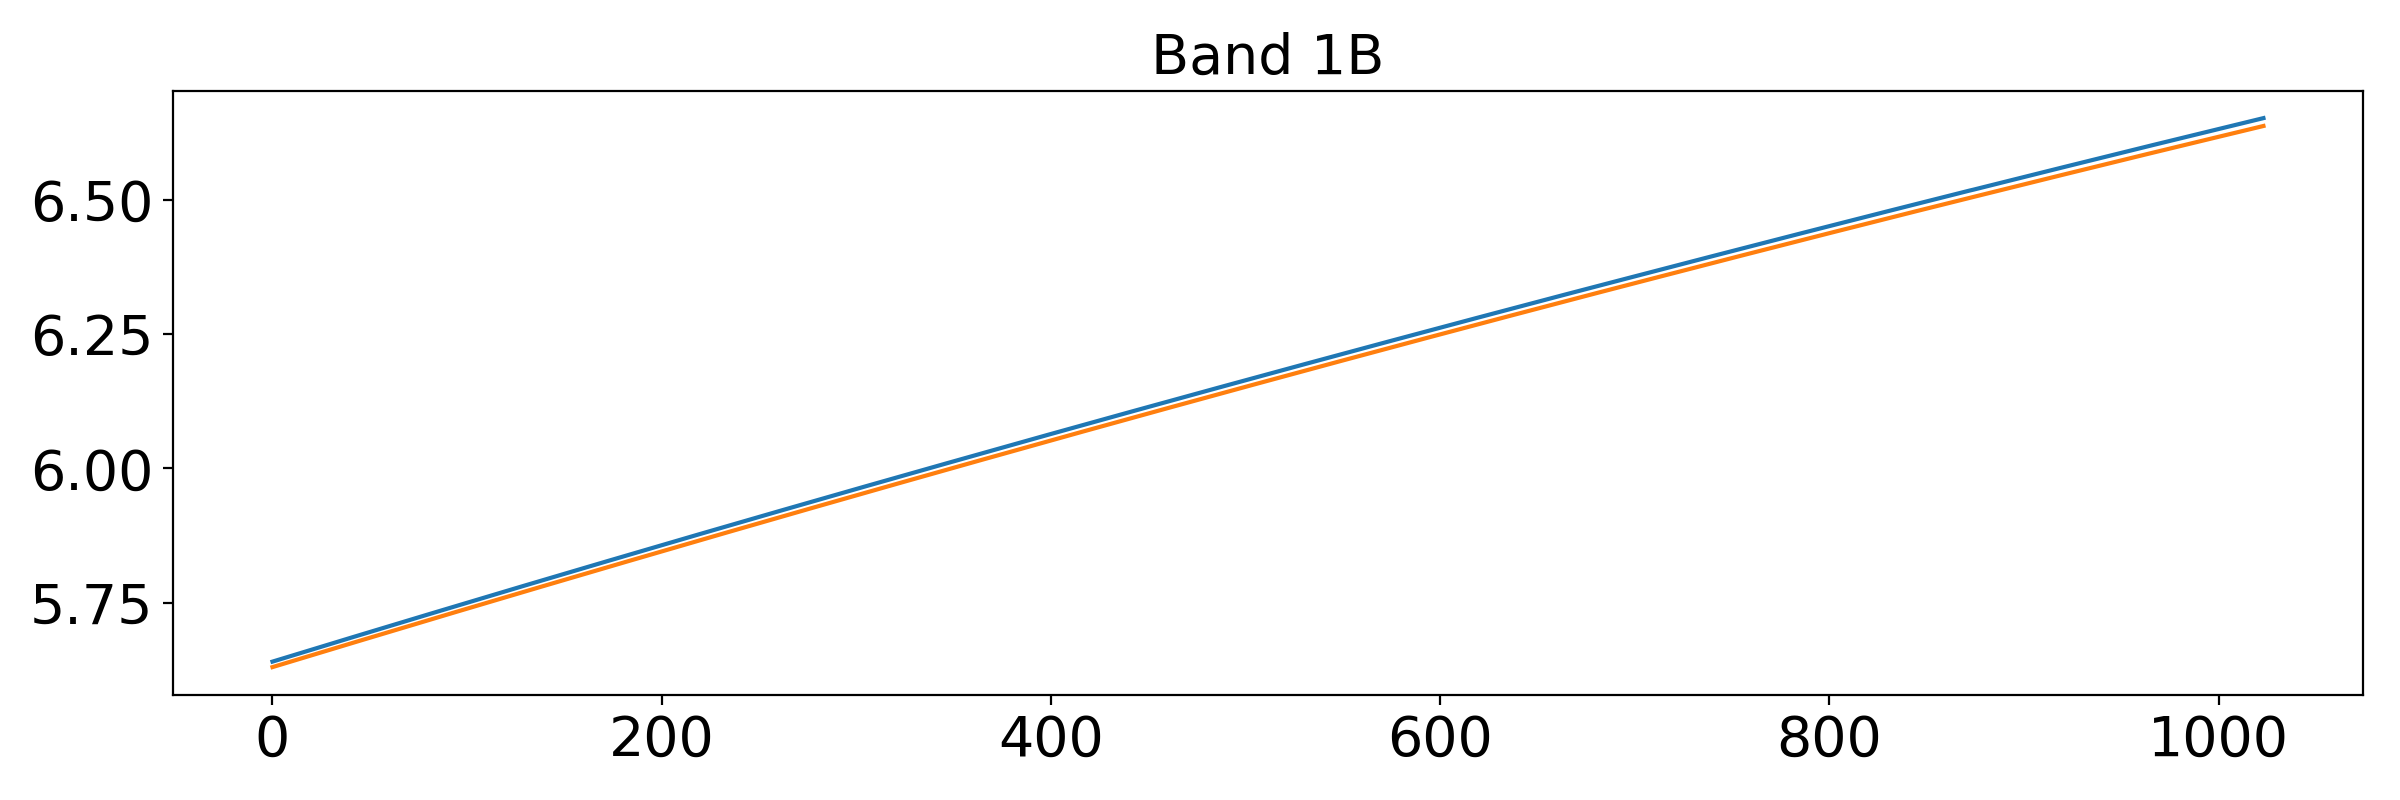

<IPython.core.display.Javascript object>


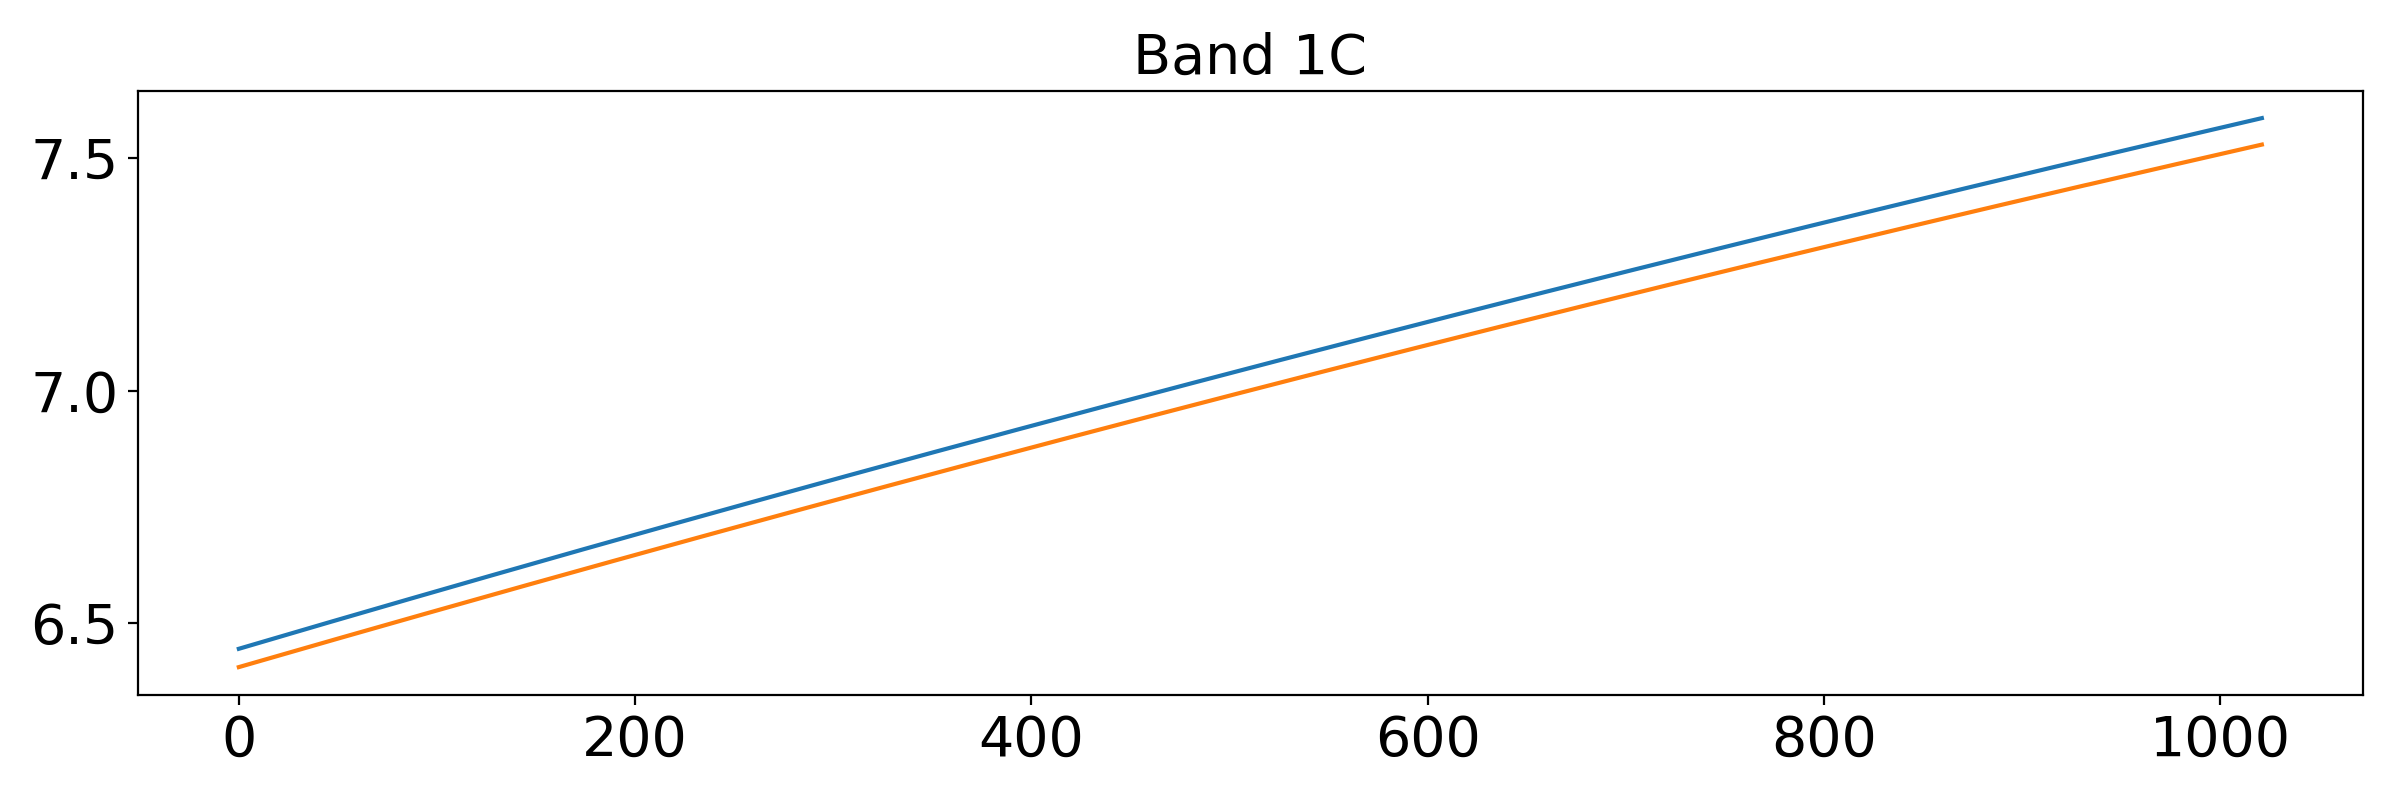

<IPython.core.display.Javascript object>


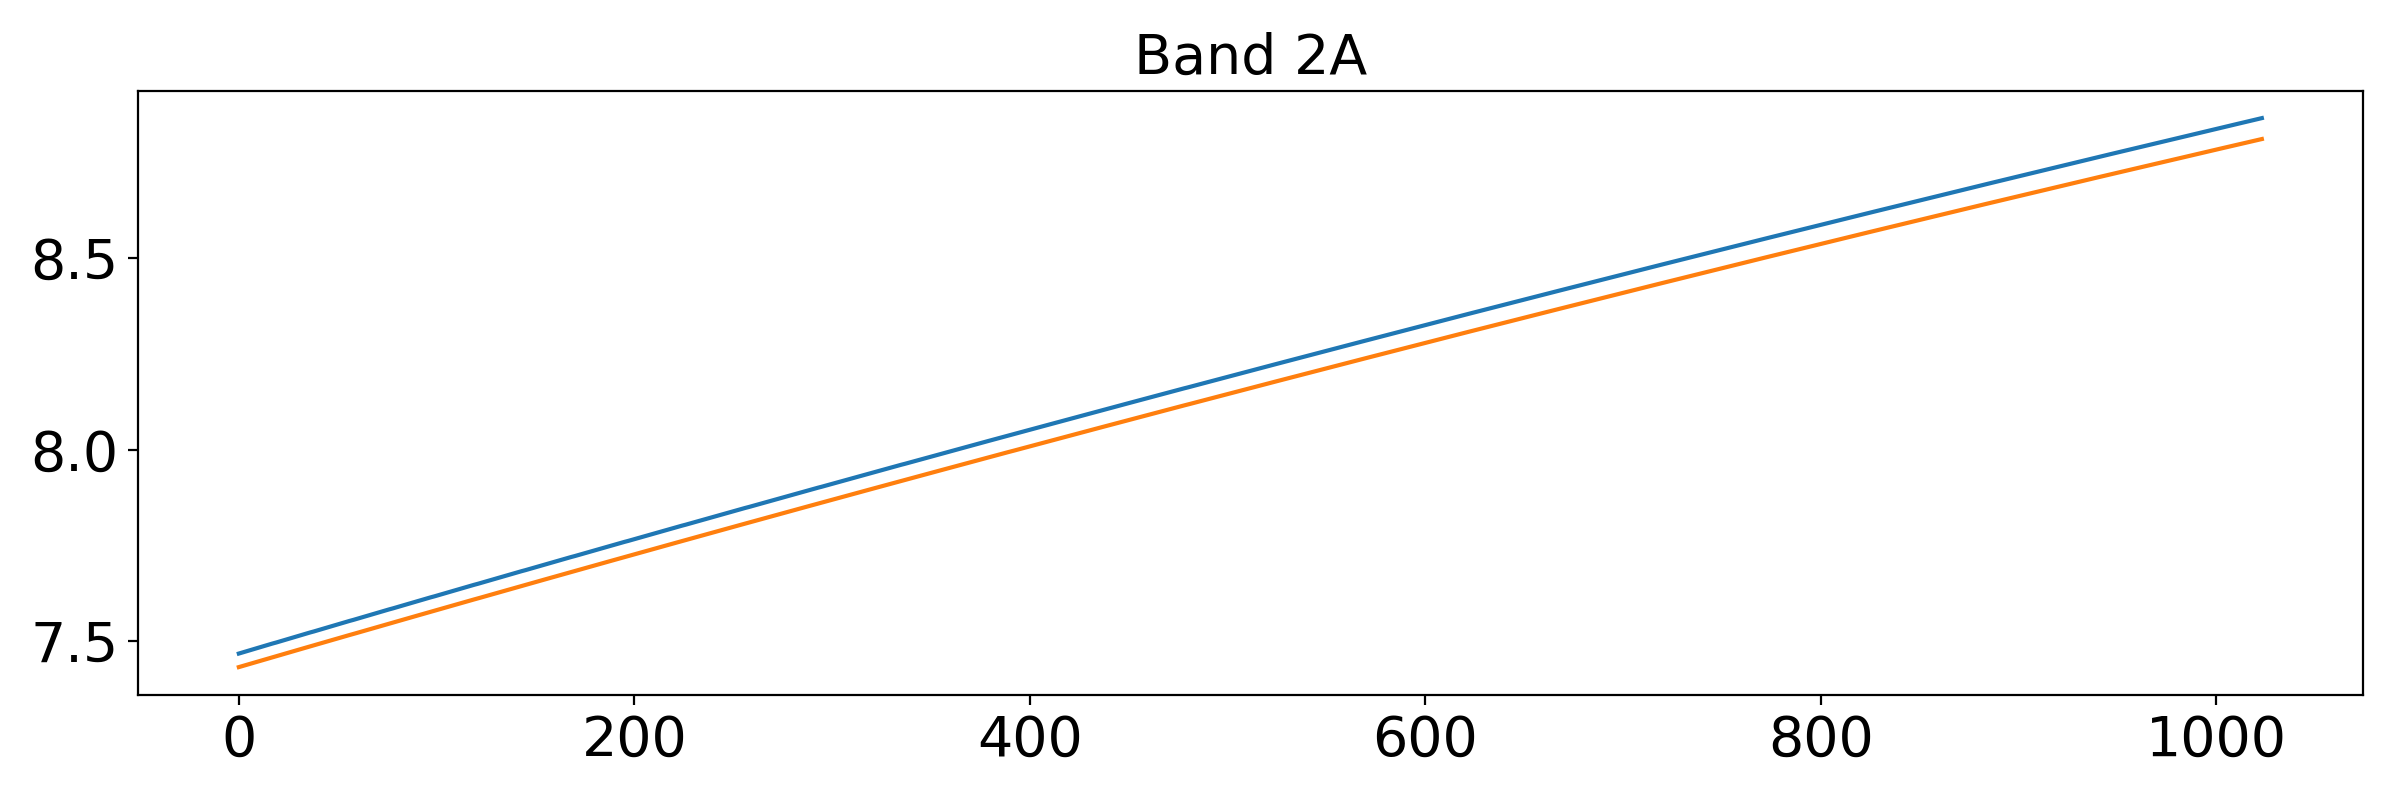

<IPython.core.display.Javascript object>


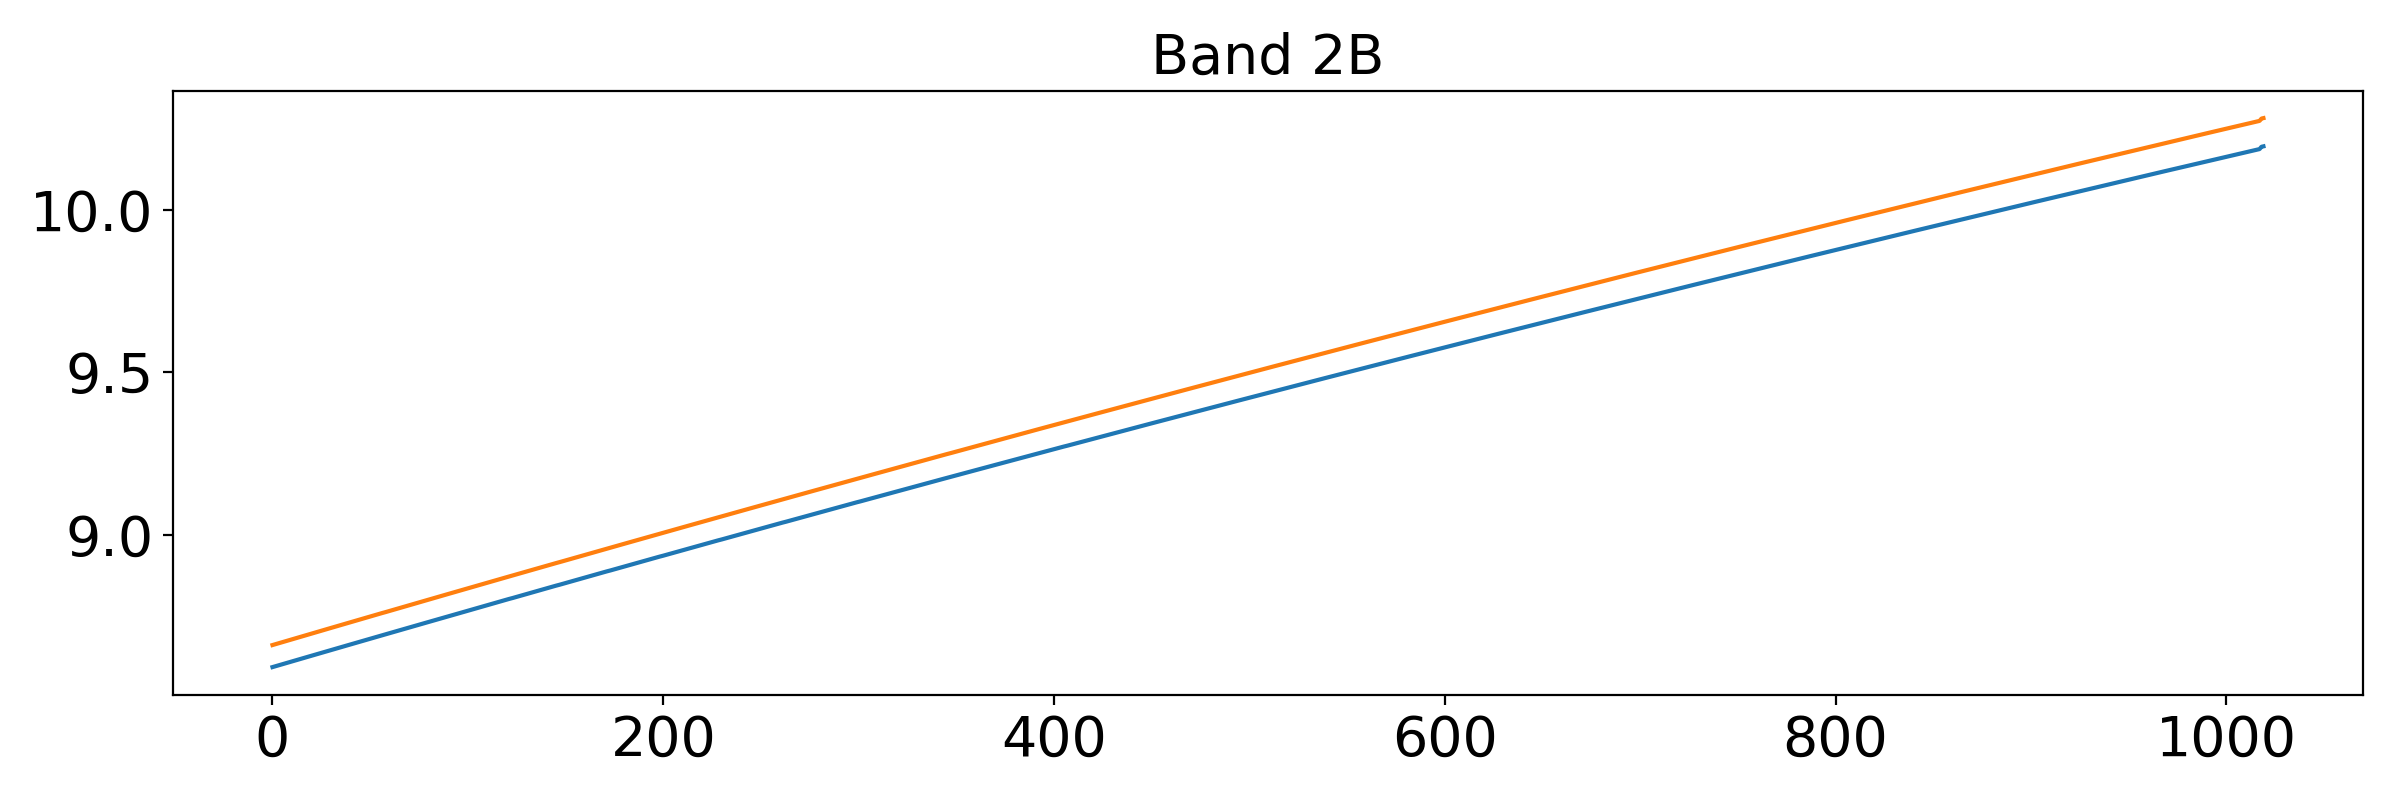

<IPython.core.display.Javascript object>


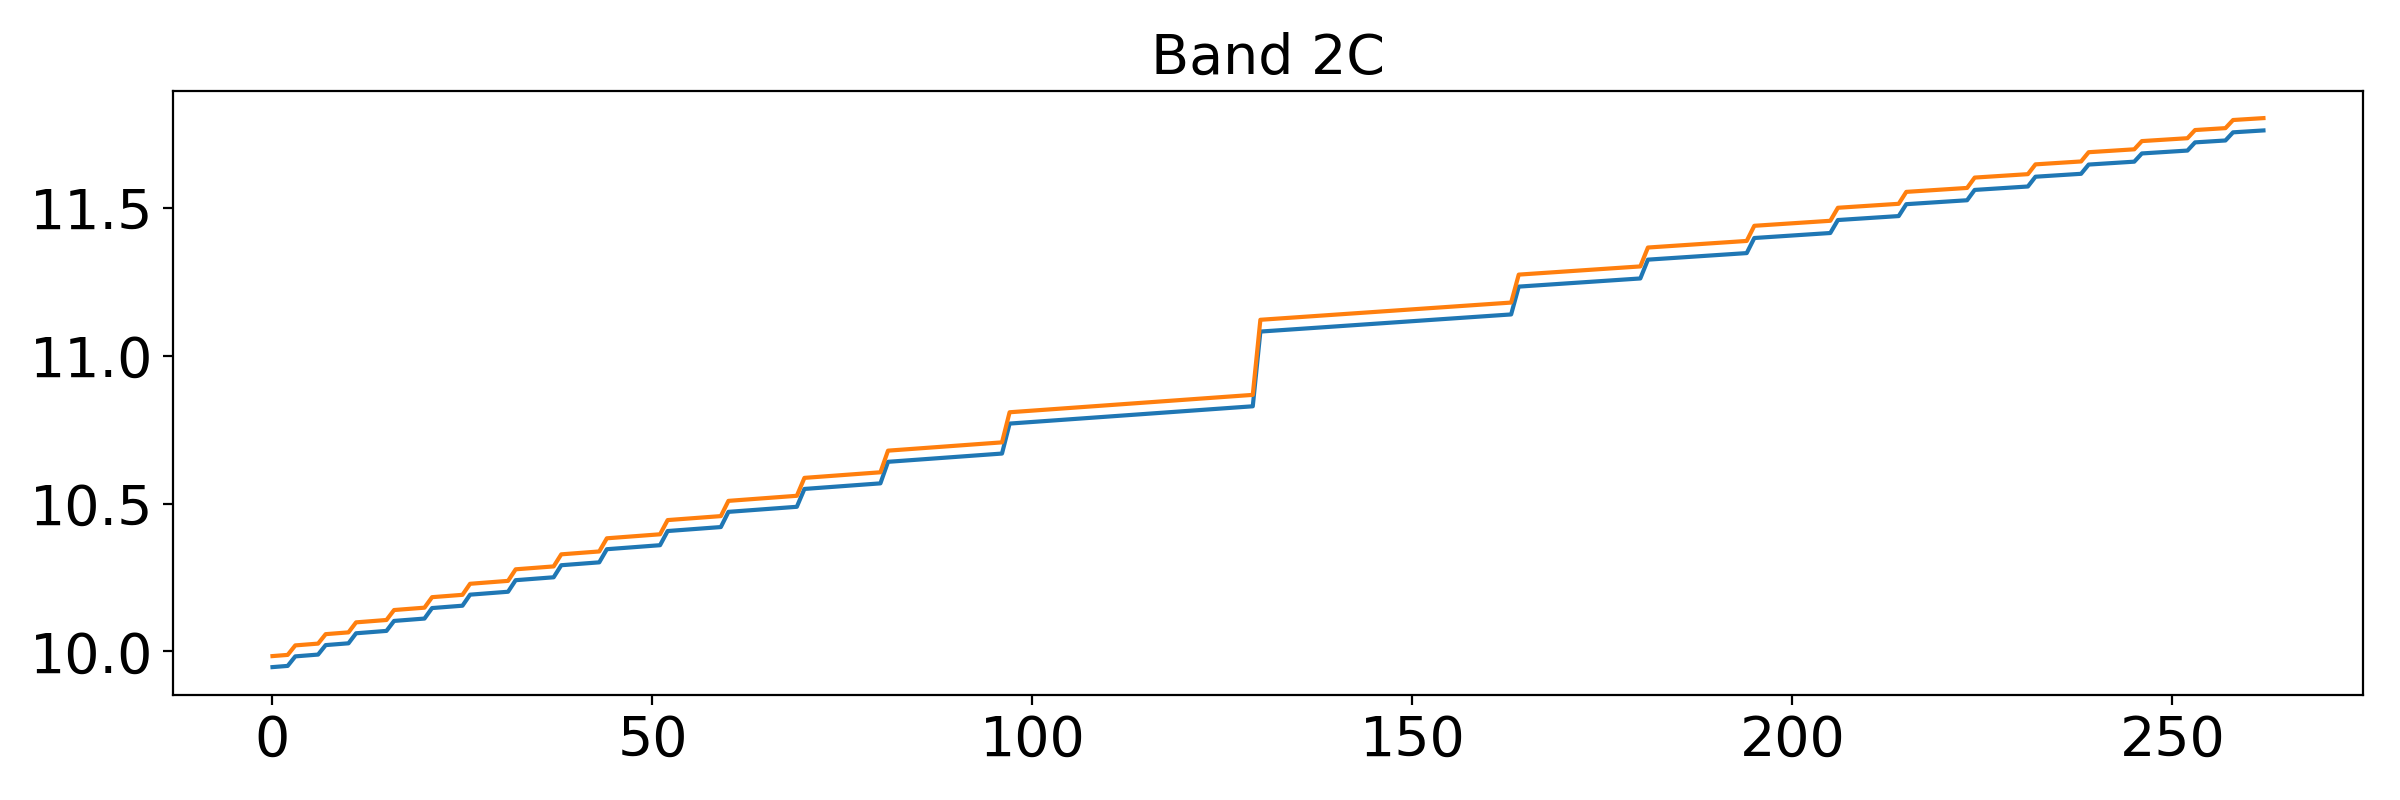

<IPython.core.display.Javascript object>


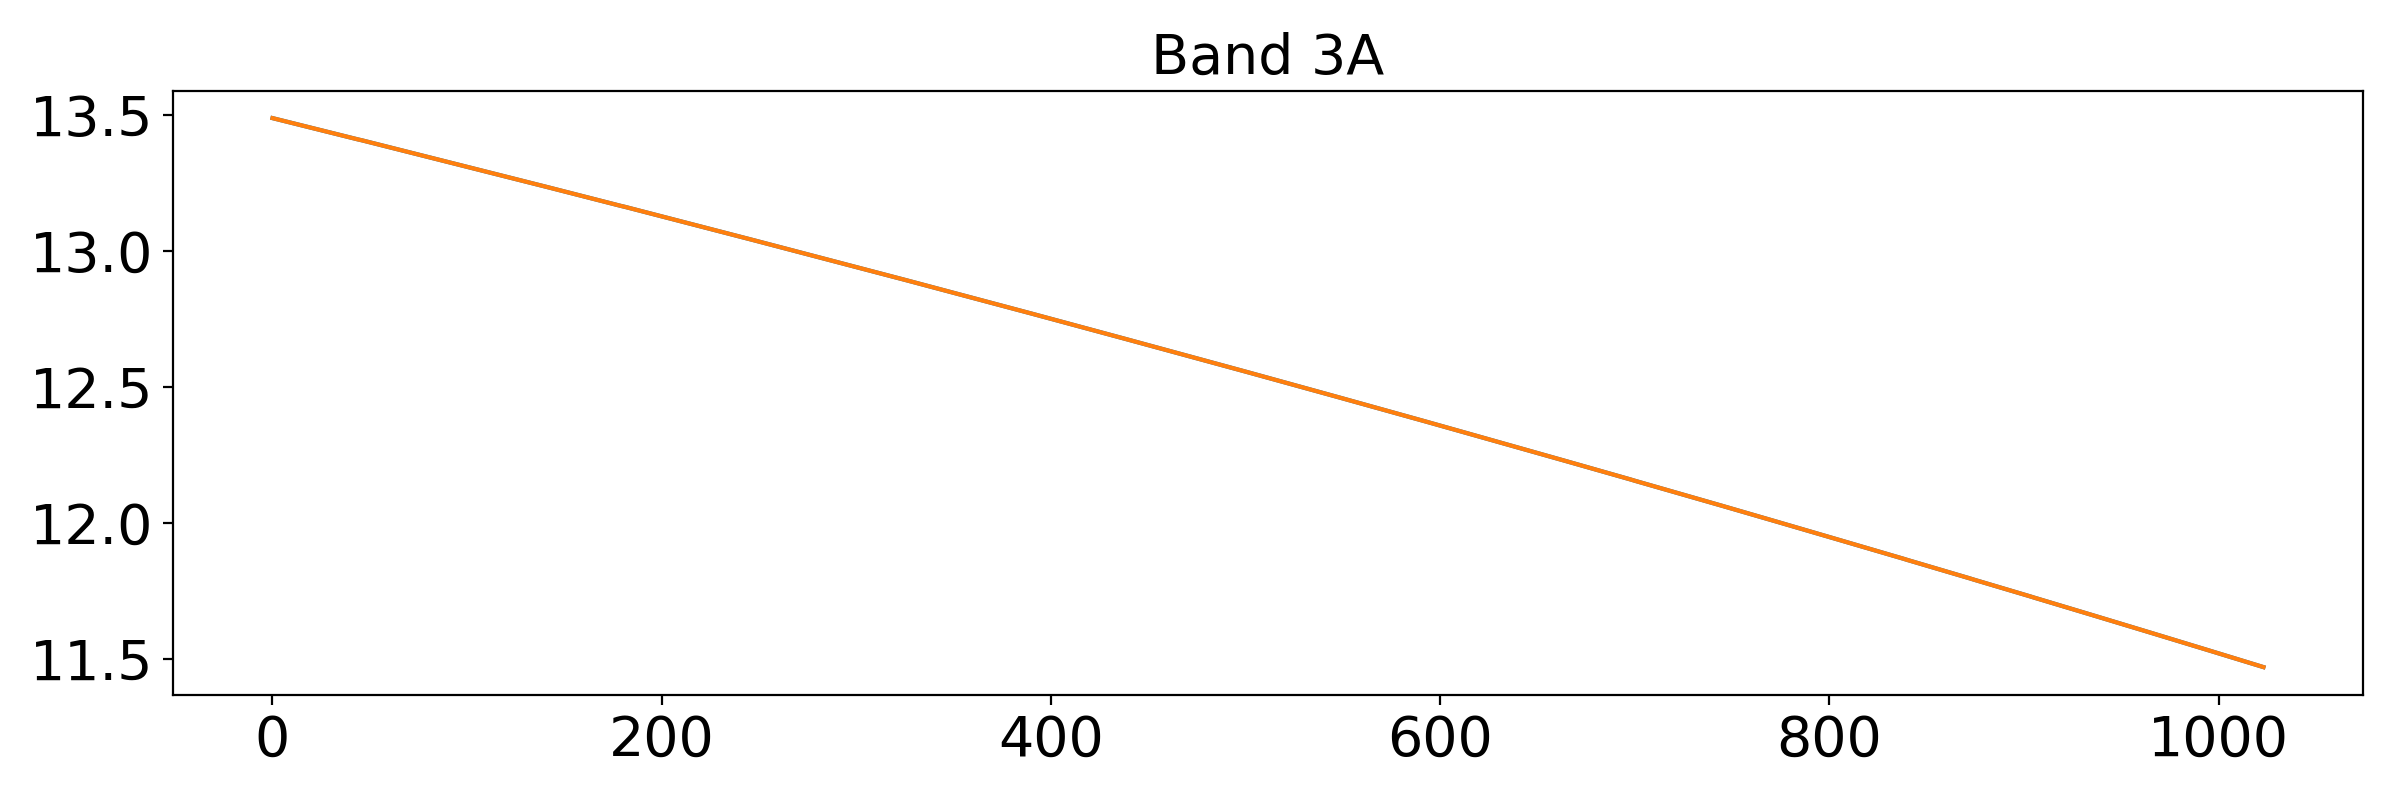

<IPython.core.display.Javascript object>


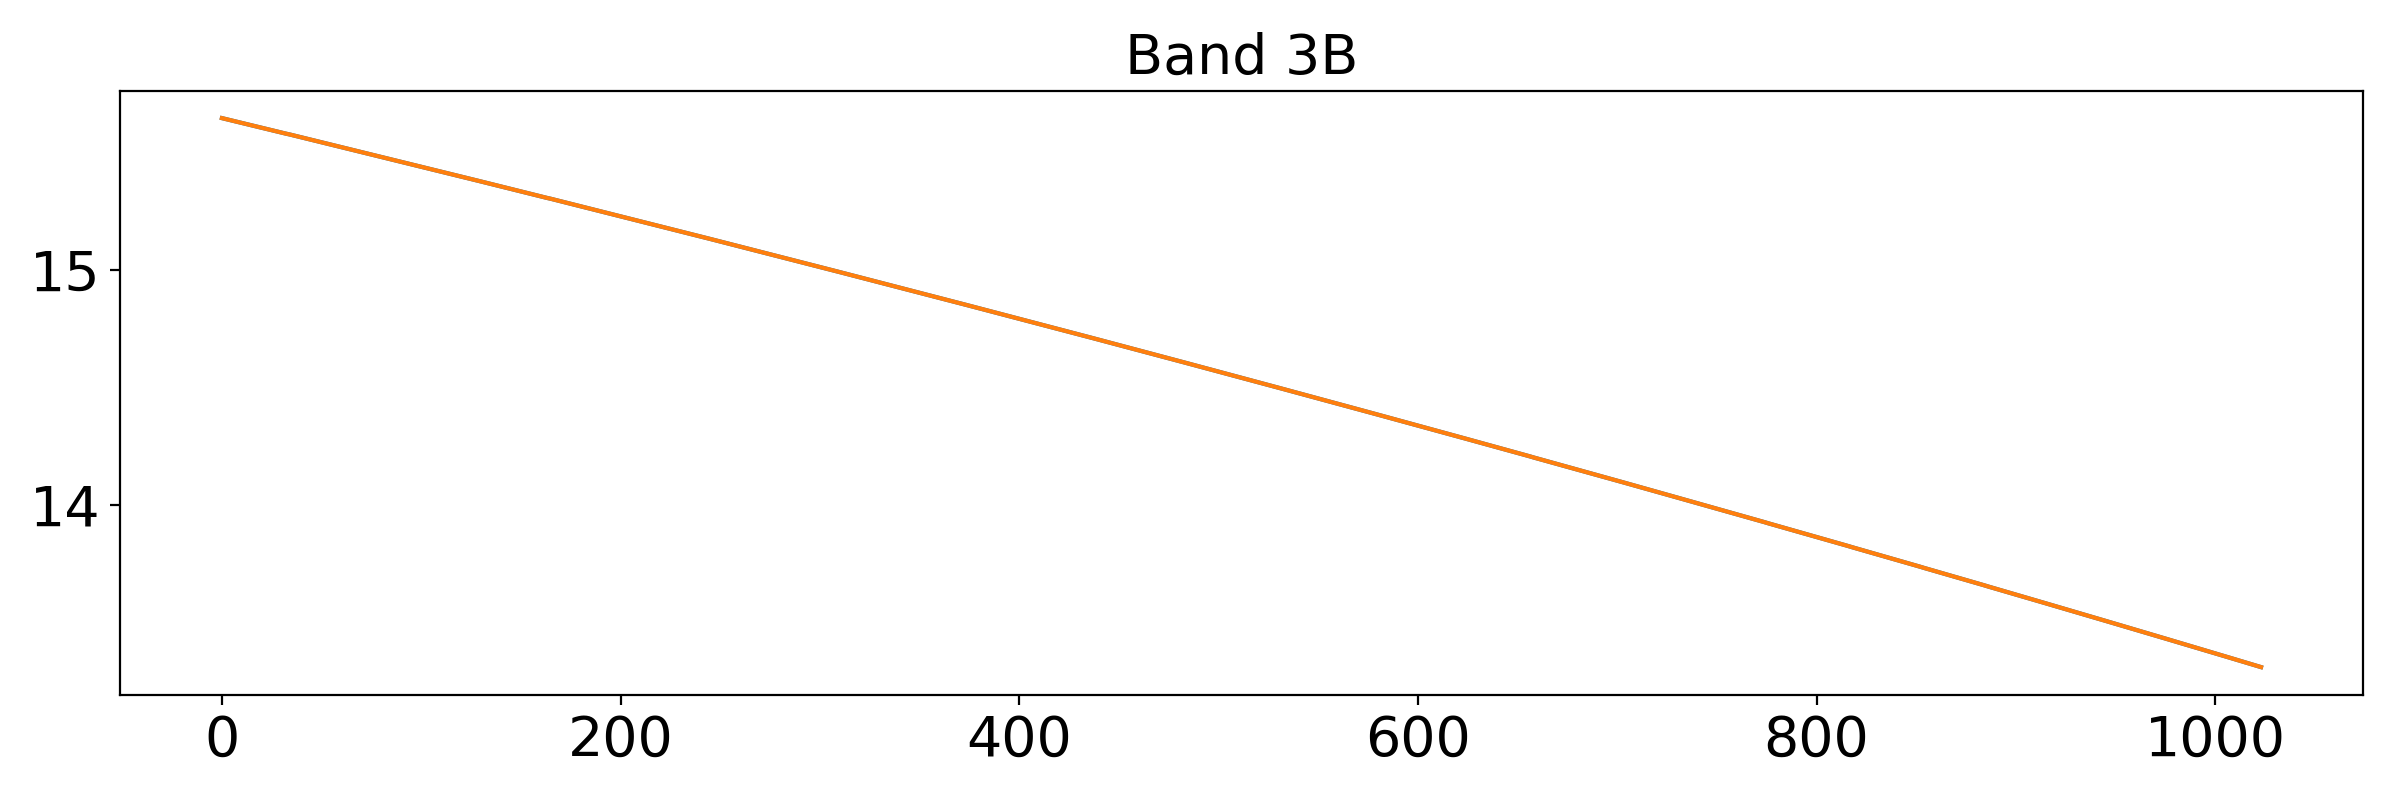

<IPython.core.display.Javascript object>


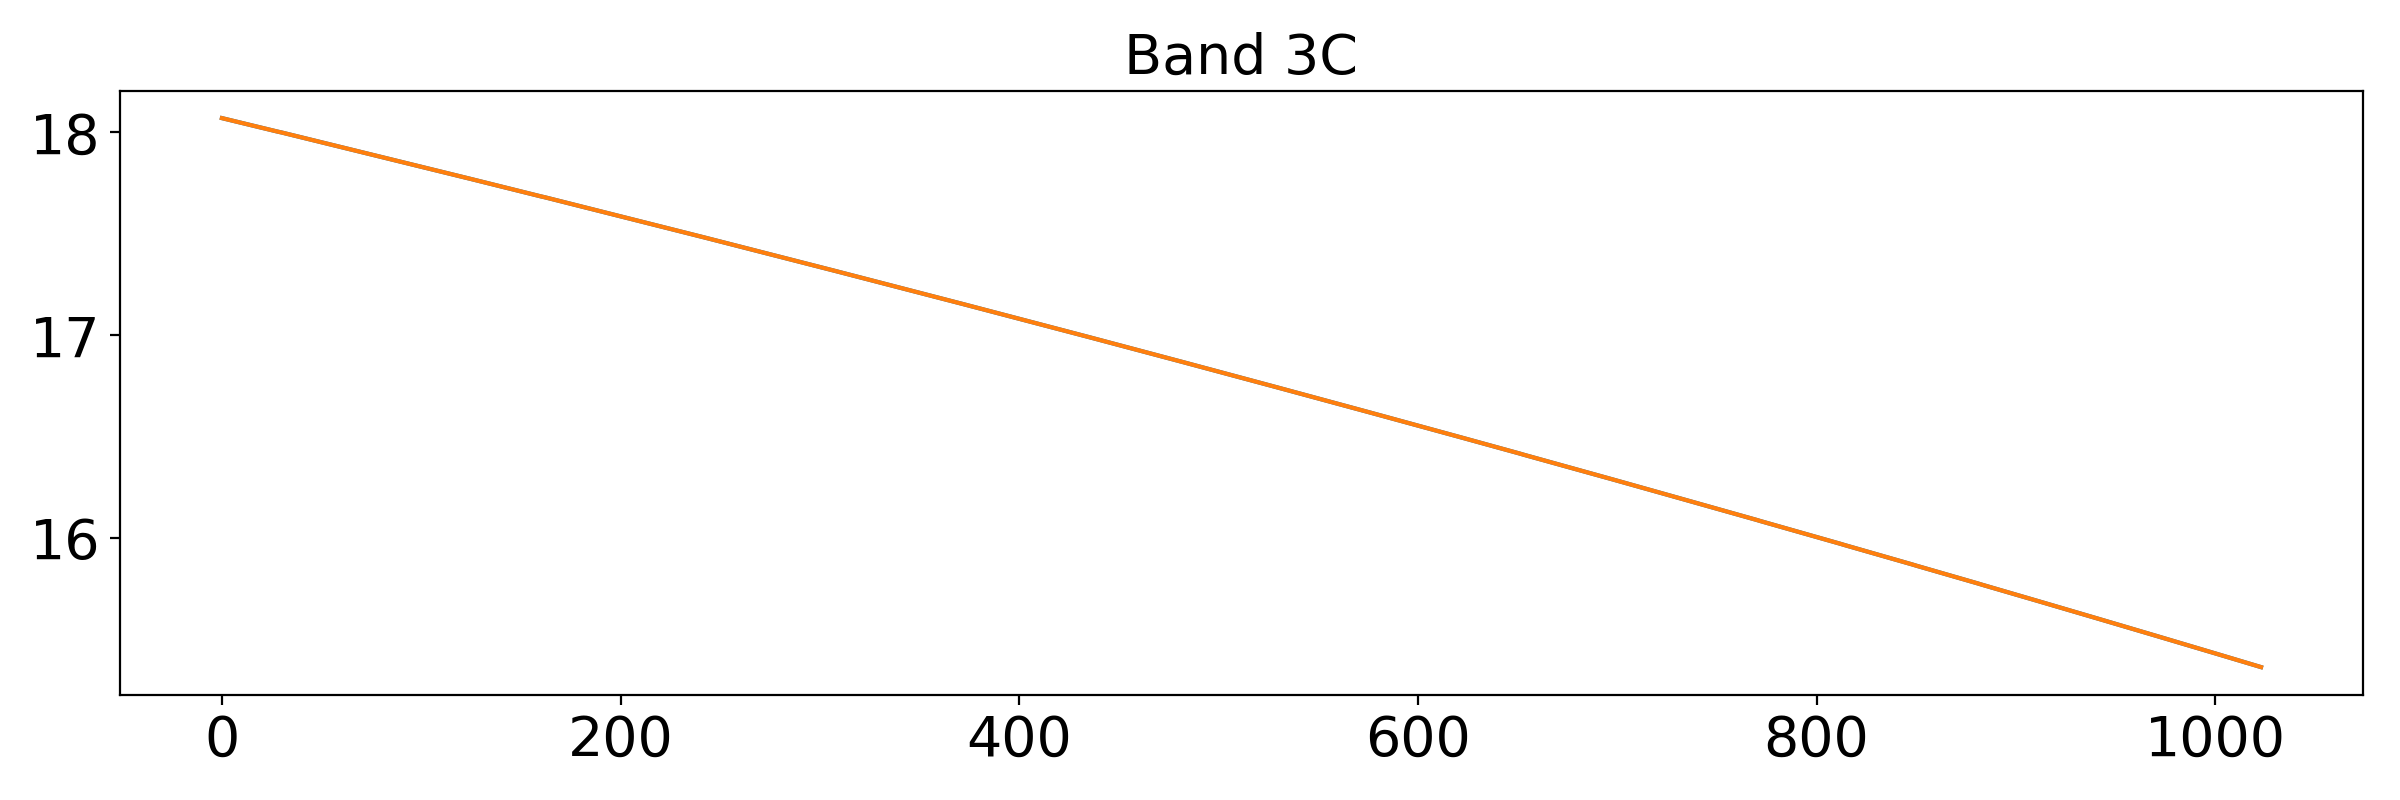

<IPython.core.display.Javascript object>


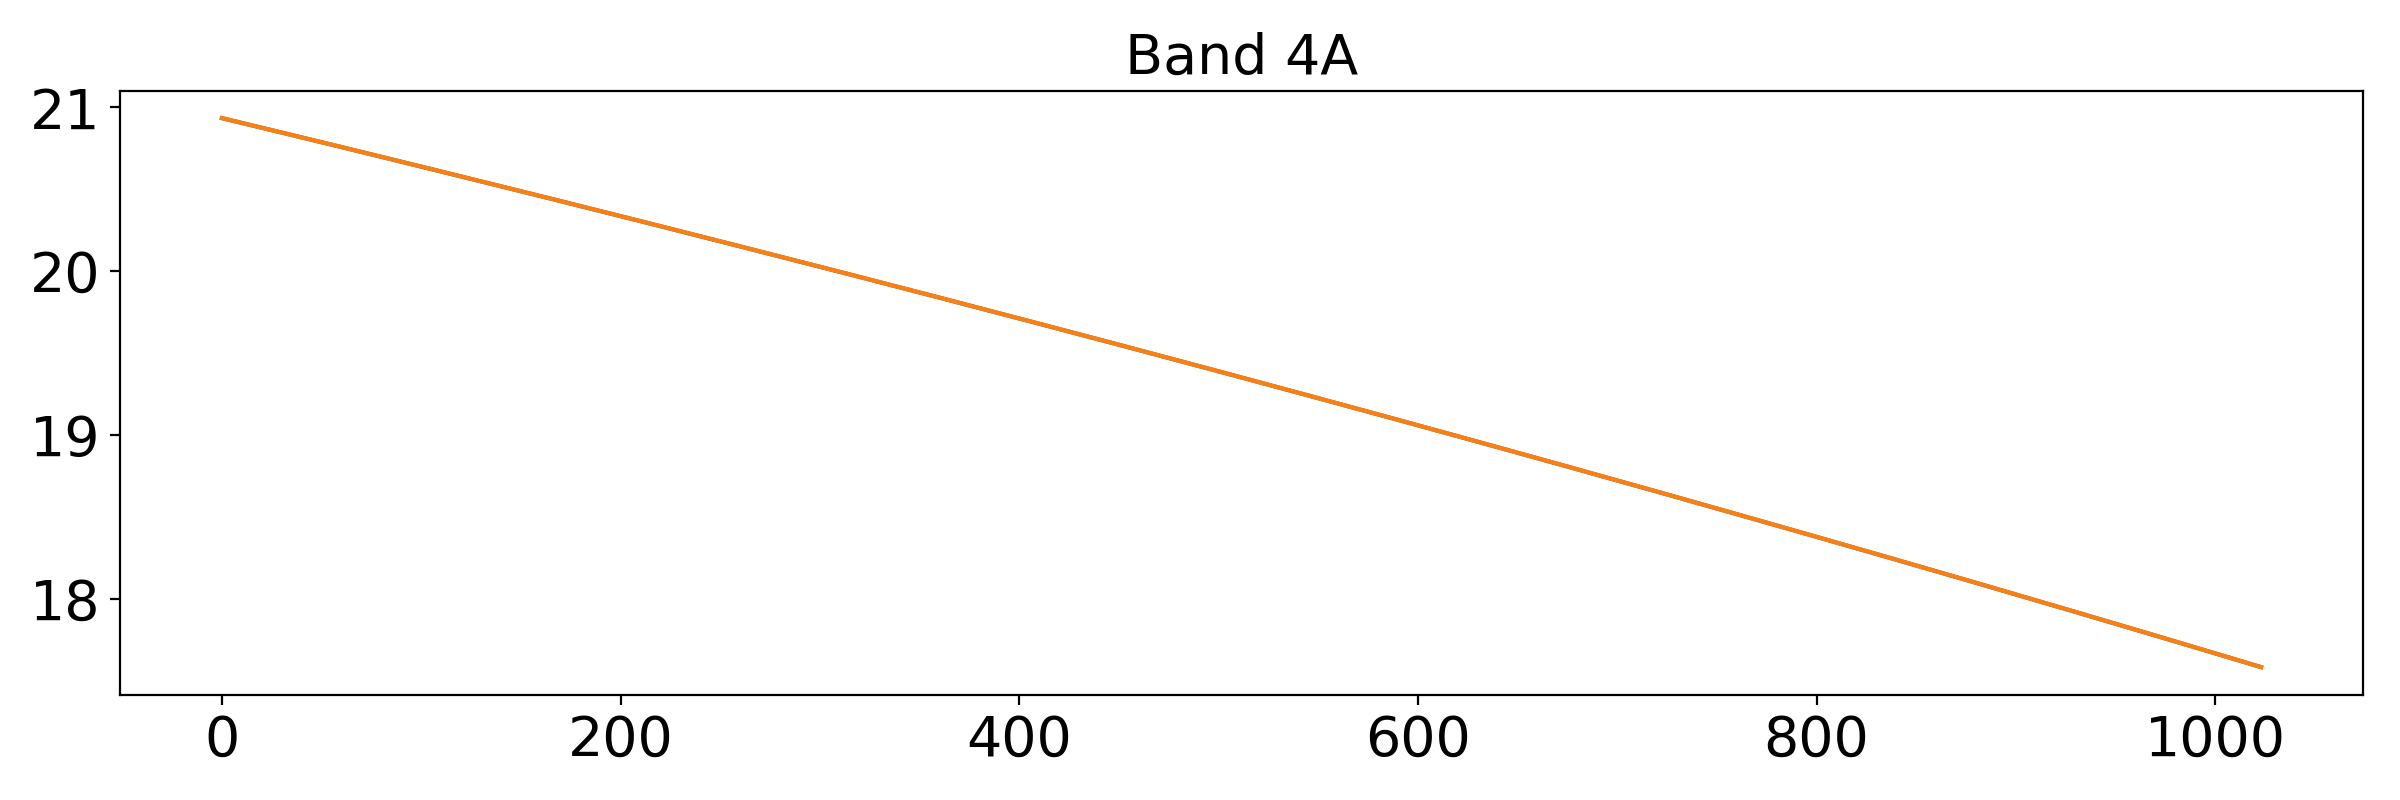

<IPython.core.display.Javascript object>


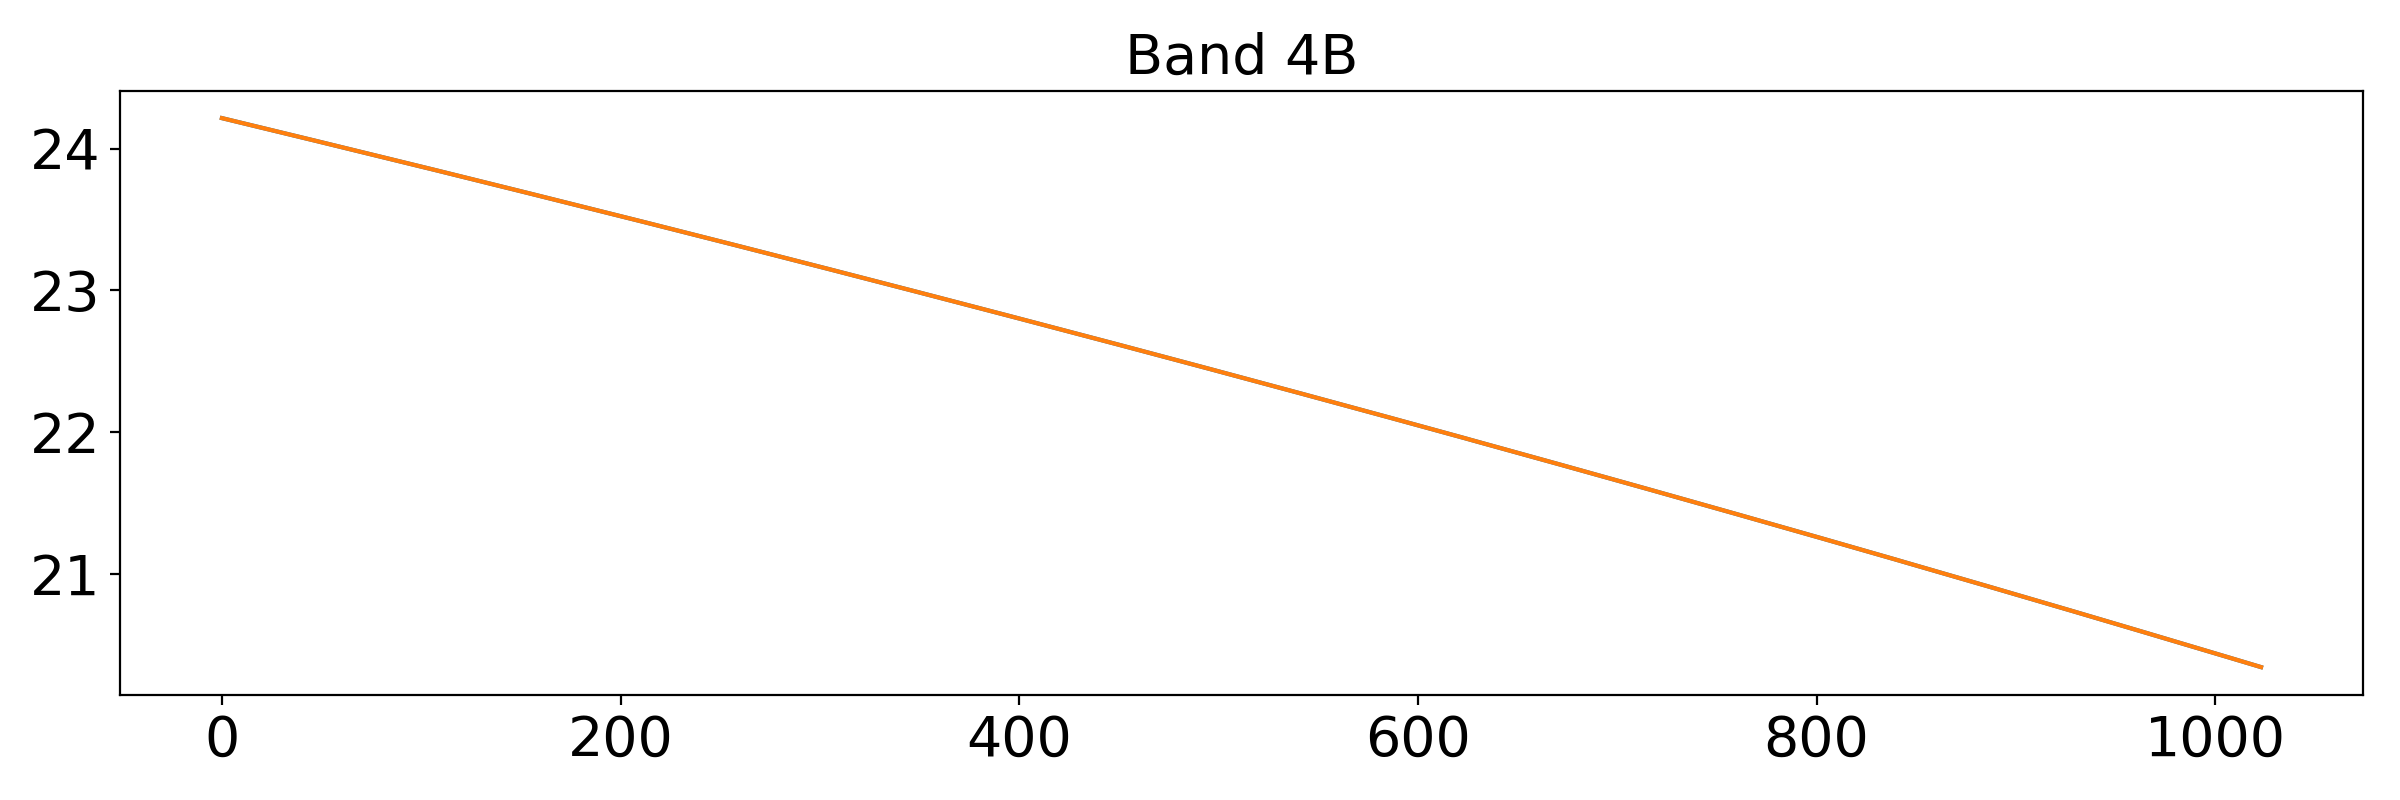

<IPython.core.display.Javascript object>


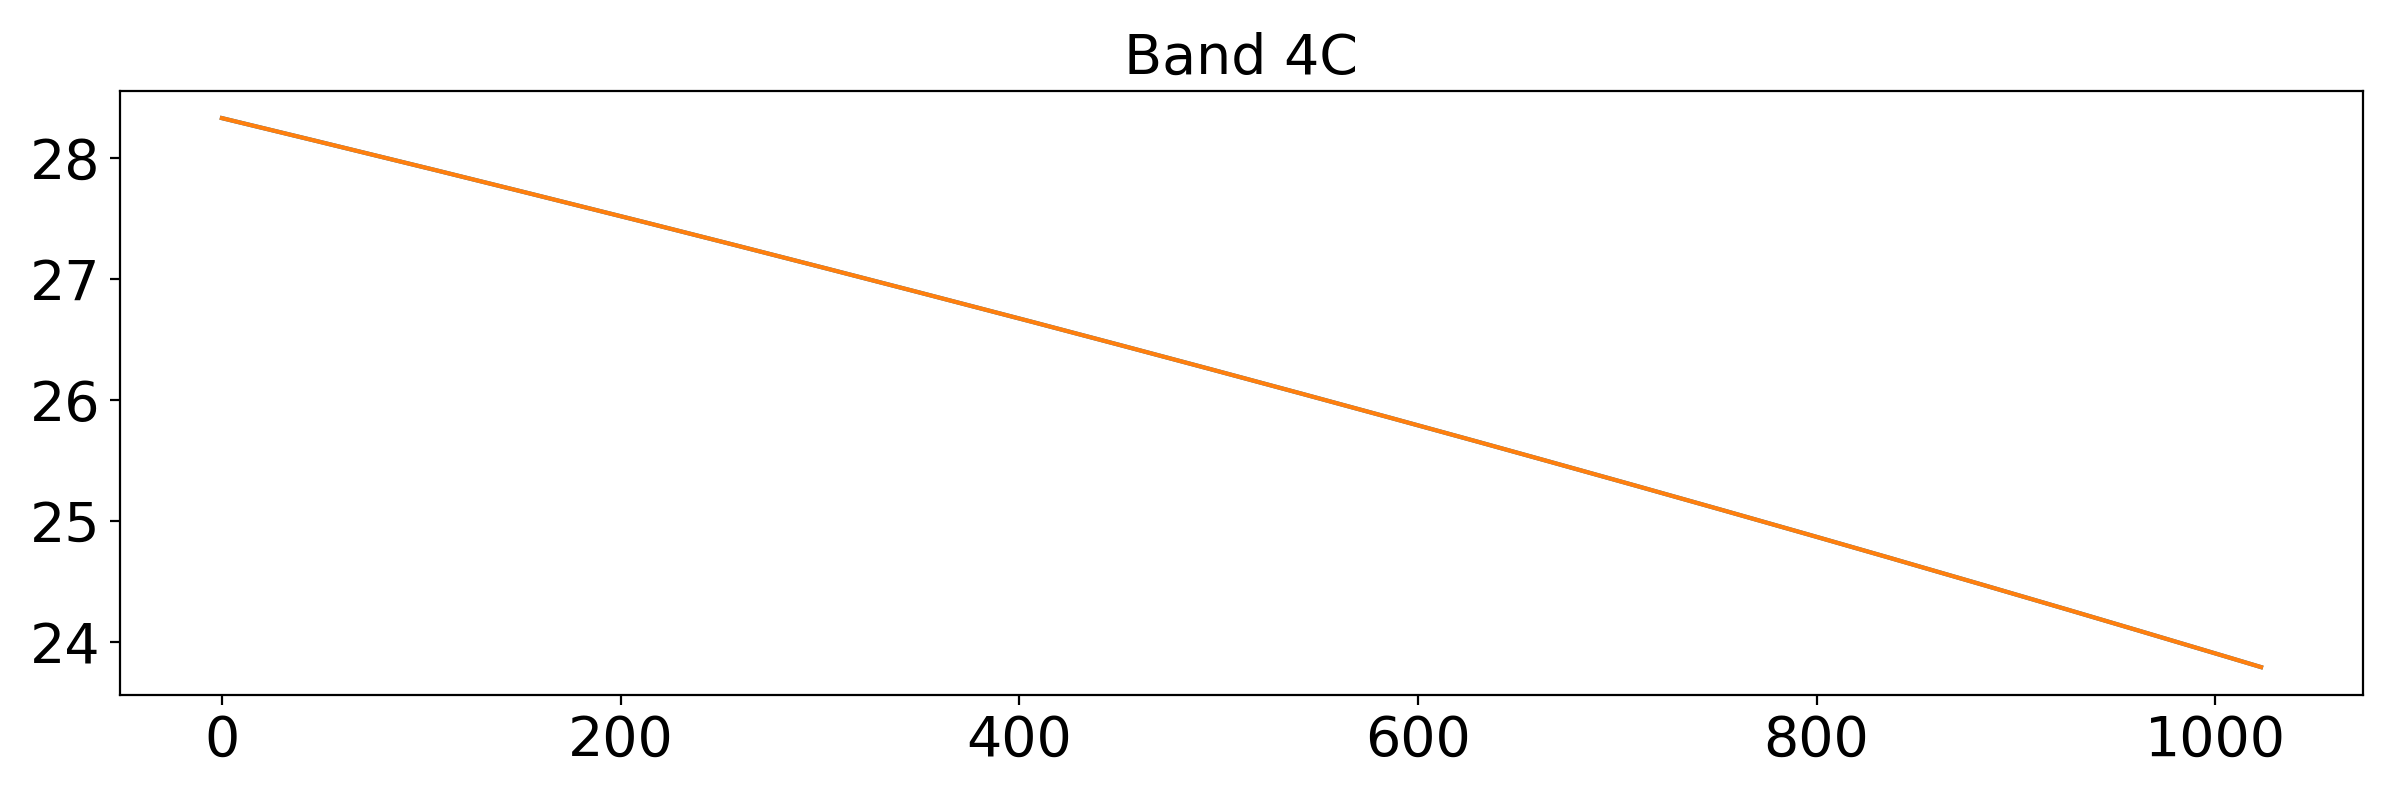

In [22]:
plt.close('all')
for band in bands:
    sel = (lambdaMap_Zemax[band][ypos,xpos[band]] != 0) & (lambdaMap[band][ypos,xpos[band]] !=0)
    plt.figure(figsize=(12,4))
    plt.plot(lambdaMap_Zemax[band][ypos,xpos[band]][sel],label='Zemax wavelength solution')
    plt.plot(lambdaMap[band][ypos,xpos[band]][sel],label='New wavelength solution')
    plt.title('Band {}'.format(band))
    plt.tight_layout()